In [1]:
from importlib import reload
from packaging import version
import tensorboard as tb
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import models
import os
import utils
reload(utils)
import utils
from torchvision import transforms
import torch
from torchvision import datasets
from matplotlib.pyplot import cm
import collections

/Users/theongu/opt/miniconda3/envs/mlmi12-mp/lib/python3.9/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


## Plot images

In [2]:
img1 = mpimg.imread('data/tiny-imagenet-200/train/n01443537/images/n01443537_0.JPEG')#1 goldfish
img2 = mpimg.imread('data/tiny-imagenet-200/train/n01629819/images/n01629819_0.JPEG')#2 European fire salamander
img3 = mpimg.imread('data/tiny-imagenet-200/train/n01641577/images/n01641577_0.JPEG')#3 bullfrog
img4 = mpimg.imread('data/tiny-imagenet-200/train/n01644900/images/n01644900_0.JPEG')#4 tailed frog
img5 = mpimg.imread('data/tiny-imagenet-200/train/n02410509/images/n02410509_0.JPEG')#51 bison
img6 = mpimg.imread('data/tiny-imagenet-200/train/n02415577/images/n02415577_0.JPEG')#52 bighorn
img7 = mpimg.imread('data/tiny-imagenet-200/train/n02423022/images/n02423022_0.JPEG')#53 gazelle
img8 = mpimg.imread('data/tiny-imagenet-200/train/n02437312/images/n02437312_0.JPEG')#54 Arabian camel

/Users/theongu/opt/miniconda3/envs/mlmi12-mp/lib/python3.9/site-packages/fontTools/misc/py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(


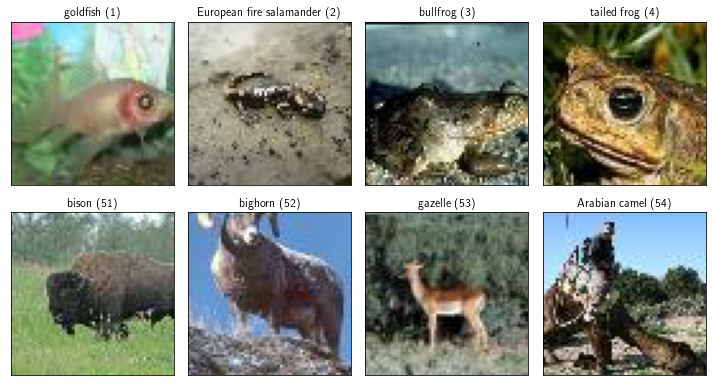

In [3]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(10,5.5))
axs[0,0].set_title('goldfish (1)')
axs[0,0].imshow(img1)
axs[0,0].get_yaxis().set_visible(False)
axs[0,0].get_xaxis().set_visible(False)

axs[0,1].imshow(img2)
axs[0,1].set_title('European fire salamander (2)')
axs[0,1].get_yaxis().set_visible(False)
axs[0,1].get_xaxis().set_visible(False)

axs[0,2].imshow(img3)
axs[0,2].set_title('bullfrog (3)')
axs[0,2].get_yaxis().set_visible(False)
axs[0,2].get_xaxis().set_visible(False)

axs[0,3].imshow(img4)
axs[0,3].set_title('tailed frog (4)')
axs[0,3].get_yaxis().set_visible(False)
axs[0,3].get_xaxis().set_visible(False)

axs[1,0].imshow(img5)
axs[1,0].set_title('bison (51)')
axs[1,0].get_yaxis().set_visible(False)
axs[1,0].get_xaxis().set_visible(False)

axs[1,1].imshow(img6)
axs[1,1].set_title('bighorn (52)')
axs[1,1].get_yaxis().set_visible(False)
axs[1,1].get_xaxis().set_visible(False)

axs[1,2].imshow(img7)
axs[1,2].set_title('gazelle (53)')
axs[1,2].get_yaxis().set_visible(False)
axs[1,2].get_xaxis().set_visible(False)

axs[1,3].imshow(img8)
axs[1,3].set_title('Arabian camel (54)')
axs[1,3].get_yaxis().set_visible(False)
axs[1,3].get_xaxis().set_visible(False)

fig.tight_layout()

plt.gcf().savefig('images/8.pdf', format='pdf', dpi=1000, bbox_inches='tight')

## Get data from Tensorboard

In [4]:
#https://tensorboard.dev/experiment/lNhZ7bljQyWBqLiGCpiPmQ/#scalars
experiment_id = "lNhZ7bljQyWBqLiGCpiPmQ"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()

In [5]:
csv_path = 'results/metrics.csv'
df.to_csv(csv_path, index=False)
df_roundtrip = pd.read_csv(csv_path)
pd.testing.assert_frame_equal(df_roundtrip, df)

In [6]:
df = pd.read_csv('results/metrics.csv')

In [7]:
df_metrics = df[~((df['tag']=='epoch') | (df['tag']=='hp_metric'))]

In [8]:
df_metrics['epoch'] = np.floor((df_metrics['step']+1)/100)

/var/folders/lb/1wyxzsf55z7c6gkffpb6jgx00000gn/T/ipykernel_6916/2723202329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metrics['epoch'] = np.floor((df_metrics['step']+1)/100)


## Hyperparameter Tuning Sigmoid

In [9]:
df1_train = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-lr-1e-05/version_0') & (df_metrics['tag']=='train_loss')]
df2_train = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-lr-5e-05/version_1') & (df_metrics['tag']=='train_loss')]
df3_train = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-lr-1e-04/version_2') & (df_metrics['tag']=='train_loss')]
df4_train = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-lr-5e-04/version_1') & (df_metrics['tag']=='train_loss')]
df5_train = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-lr-1e-03/version_1') & (df_metrics['tag']=='train_loss')]

df1_val = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-lr-1e-05/version_0') & (df_metrics['tag']=='val_loss')]
df2_val = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-lr-5e-05/version_1') & (df_metrics['tag']=='val_loss')]
df3_val = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-lr-1e-04/version_2') & (df_metrics['tag']=='val_loss')]
df4_val = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-lr-5e-04/version_1') & (df_metrics['tag']=='val_loss')]
df5_val = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-lr-1e-03/version_1') & (df_metrics['tag']=='val_loss')]

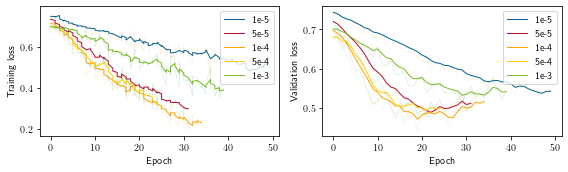

In [10]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8,2.5))
linewidth = 1.0
span = 5
alpha = 0.2

axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Training loss')
axs[0].plot(df1_train['epoch'], df1_train['value'].ewm(span=span, adjust=False).mean(), '#006298', label='1e-5', linewidth=linewidth)
axs[0].plot(df1_train['epoch'], df1_train['value'], 'orange', linewidth=linewidth/2, alpha=alpha)
axs[0].plot(df2_train['epoch'], df2_train['value'].ewm(span=span, adjust=False).mean(), '#BA0C2F', label='5e-5', linewidth=linewidth)
axs[0].plot(df2_train['epoch'], df2_train['value'], 'g', linewidth=linewidth/2, alpha=alpha)
axs[0].plot(df3_train['epoch'], df3_train['value'].ewm(span=span, adjust=False).mean(), '#FFA300', label='1e-4', linewidth=linewidth)
axs[0].plot(df3_train['epoch'], df3_train['value'], 'orange', linewidth=linewidth/2, alpha=alpha)
axs[0].plot(df4_train['epoch'], df4_train['value'].ewm(span=span, adjust=False).mean(), '#FFD100', label='5e-4', linewidth=linewidth)
axs[0].plot(df4_train['epoch'], df4_train['value'], 'g', linewidth=linewidth/2, alpha=alpha)
axs[0].plot(df5_train['epoch'], df5_train['value'].ewm(span=span, adjust=False).mean(), '#78BE20', label='1e-3', linewidth=linewidth)
axs[0].plot(df5_train['epoch'], df5_train['value'], 'g', linewidth=linewidth/2, alpha=alpha)
axs[0].legend(loc='upper right')

axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Validation loss')
axs[1].plot(df1_val['epoch'], df1_val['value'].ewm(span=span, adjust=False).mean(), '#006298', label='1e-5', linewidth=linewidth)
axs[1].plot(df1_val['epoch'], df1_val['value'], 'orange', linewidth=linewidth/2, alpha=alpha)
axs[1].plot(df2_val['epoch'], df2_val['value'].ewm(span=span, adjust=False).mean(), '#BA0C2F', label='5e-5', linewidth=linewidth)
axs[1].plot(df2_val['epoch'], df2_val['value'], 'g', linewidth=linewidth/2, alpha=alpha)
axs[1].plot(df3_val['epoch'], df3_val['value'].ewm(span=span, adjust=False).mean(), '#FFA300', label='1e-4', linewidth=linewidth)
axs[1].plot(df3_val['epoch'], df3_val['value'], 'orange', linewidth=linewidth/2, alpha=alpha)
axs[1].plot(df4_val['epoch'], df4_val['value'].ewm(span=span, adjust=False).mean(), '#FFD100', label='5e-4', linewidth=linewidth)
axs[1].plot(df4_val['epoch'], df4_val['value'], 'g', linewidth=linewidth/2, alpha=alpha)
axs[1].plot(df5_val['epoch'], df5_val['value'].ewm(span=span, adjust=False).mean(), '#78BE20', label='1e-3', linewidth=linewidth)
axs[1].plot(df5_val['epoch'], df5_val['value'], 'g', linewidth=linewidth/2, alpha=alpha)
axs[1].legend(loc='upper right')
fig.tight_layout()
plt.gcf().savefig('images/6.pdf', format='pdf', dpi=1000, bbox_inches='tight')

In [11]:
idx_df1_val_min = df1_val['value'].idxmin()
epoch_df1_val_min = df1_val.loc[idx_df1_val_min]['epoch']
print('1e-5:',df1_val[df1_val['epoch']==epoch_df1_val_min]['value'].values[0])

idx_df2_val_min = df2_val['value'].idxmin()
epoch_df2_val_min = df2_val.loc[idx_df2_val_min]['epoch']
print('5e-5:',df2_val[df2_val['epoch']==epoch_df2_val_min]['value'].values[0])

idx_df3_val_min = df3_val['value'].idxmin()
epoch_df3_val_min = df3_val.loc[idx_df3_val_min]['epoch']
print('1e-4:',df3_val[df3_val['epoch']==epoch_df3_val_min]['value'].values[0])

idx_df4_val_min = df4_val['value'].idxmin()
epoch_df4_val_min = df4_val.loc[idx_df4_val_min]['epoch']
print('5e-4:',df4_val[df4_val['epoch']==epoch_df4_val_min]['value'].values[0])

idx_df5_val_min = df5_val['value'].idxmin()
epoch_df5_val_min = df5_val.loc[idx_df5_val_min]['epoch']
print('1e-3:',df5_val[df5_val['epoch']==epoch_df5_val_min]['value'].values[0])

1e-5: 0.5310724973678589
5e-5: 0.478832334280014
1e-4: 0.4441709220409393
5e-4: 0.4741168618202209
1e-3: 0.5116811990737915


## Hyperparameter Tuning Cosine

In [12]:
df1_train = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-lr-1e-05/version_0') & (df_metrics['tag']=='train_loss')]
df2_train = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-lr-5e-05/version_0') & (df_metrics['tag']=='train_loss')]
df3_train = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-lr-1e-04/version_0') & (df_metrics['tag']=='train_loss')]
df4_train = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-lr-5e-04/version_0') & (df_metrics['tag']=='train_loss')]
df5_train = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-lr-1e-03/version_0') & (df_metrics['tag']=='train_loss')]

df1_val = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-lr-1e-05/version_0') & (df_metrics['tag']=='val_loss')]
df2_val = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-lr-5e-05/version_0') & (df_metrics['tag']=='val_loss')]
df3_val = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-lr-1e-04/version_0') & (df_metrics['tag']=='val_loss')]
df4_val = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-lr-5e-04/version_0') & (df_metrics['tag']=='val_loss')]
df5_val = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-lr-1e-03/version_0') & (df_metrics['tag']=='val_loss')]

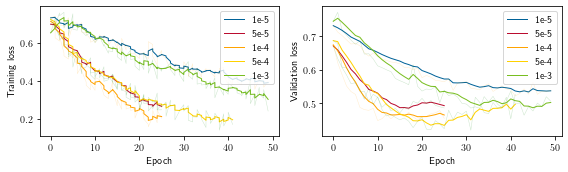

In [13]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8,2.5))
linewidth = 1.0
span = 5
alpha = 0.2

axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Training loss')
axs[0].plot(df1_train['epoch'], df1_train['value'].ewm(span=span, adjust=False).mean(), '#006298', label='1e-5', linewidth=linewidth)
axs[0].plot(df1_train['epoch'], df1_train['value'], 'orange', linewidth=linewidth/2, alpha=alpha)
axs[0].plot(df2_train['epoch'], df2_train['value'].ewm(span=span, adjust=False).mean(), '#BA0C2F', label='5e-5', linewidth=linewidth)
axs[0].plot(df2_train['epoch'], df2_train['value'], 'g', linewidth=linewidth/2, alpha=alpha)
axs[0].plot(df3_train['epoch'], df3_train['value'].ewm(span=span, adjust=False).mean(), '#FFA300', label='1e-4', linewidth=linewidth)
axs[0].plot(df3_train['epoch'], df3_train['value'], 'orange', linewidth=linewidth/2, alpha=alpha)
axs[0].plot(df4_train['epoch'], df4_train['value'].ewm(span=span, adjust=False).mean(), '#FFD100', label='5e-4', linewidth=linewidth)
axs[0].plot(df4_train['epoch'], df4_train['value'], 'g', linewidth=linewidth/2, alpha=alpha)
axs[0].plot(df5_train['epoch'], df5_train['value'].ewm(span=span, adjust=False).mean(), '#78BE20', label='1e-3', linewidth=linewidth)
axs[0].plot(df5_train['epoch'], df5_train['value'], 'g', linewidth=linewidth/2, alpha=alpha)
axs[0].legend(loc='upper right')

axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Validation loss')
axs[1].plot(df1_val['epoch'], df1_val['value'].ewm(span=span, adjust=False).mean(), '#006298', label='1e-5', linewidth=linewidth)
axs[1].plot(df1_val['epoch'], df1_val['value'], 'orange', linewidth=linewidth/2, alpha=alpha)
axs[1].plot(df2_val['epoch'], df2_val['value'].ewm(span=span, adjust=False).mean(), '#BA0C2F', label='5e-5', linewidth=linewidth)
axs[1].plot(df2_val['epoch'], df2_val['value'], 'g', linewidth=linewidth/2, alpha=alpha)
axs[1].plot(df3_val['epoch'], df3_val['value'].ewm(span=span, adjust=False).mean(), '#FFA300', label='1e-4', linewidth=linewidth)
axs[1].plot(df3_val['epoch'], df3_val['value'], 'orange', linewidth=linewidth/2, alpha=alpha)
axs[1].plot(df4_val['epoch'], df4_val['value'].ewm(span=span, adjust=False).mean(), '#FFD100', label='5e-4', linewidth=linewidth)
axs[1].plot(df4_val['epoch'], df4_val['value'], 'g', linewidth=linewidth/2, alpha=alpha)
axs[1].plot(df5_val['epoch'], df5_val['value'].ewm(span=span, adjust=False).mean(), '#78BE20', label='1e-3', linewidth=linewidth)
axs[1].plot(df5_val['epoch'], df5_val['value'], 'g', linewidth=linewidth/2, alpha=alpha)
axs[1].legend(loc='upper right')
fig.tight_layout()
plt.gcf().savefig('images/7.pdf', format='pdf', dpi=1000, bbox_inches='tight')

In [14]:
idx_df1_val_min = df1_val['value'].idxmin()
epoch_df1_val_min = df1_val.loc[idx_df1_val_min]['epoch']
print('1e-5:',df1_val[df1_val['epoch']==epoch_df1_val_min]['value'].values[0])

idx_df2_val_min = df2_val['value'].idxmin()
epoch_df2_val_min = df2_val.loc[idx_df2_val_min]['epoch']
print('5e-5:',df2_val[df2_val['epoch']==epoch_df2_val_min]['value'].values[0])

idx_df3_val_min = df3_val['value'].idxmin()
epoch_df3_val_min = df3_val.loc[idx_df3_val_min]['epoch']
print('1e-4:',df3_val[df3_val['epoch']==epoch_df3_val_min]['value'].values[0])

idx_df4_val_min = df4_val['value'].idxmin()
epoch_df4_val_min = df4_val.loc[idx_df4_val_min]['epoch']
print('5e-4:',df4_val[df4_val['epoch']==epoch_df4_val_min]['value'].values[0])

idx_df5_val_min = df5_val['value'].idxmin()
epoch_df5_val_min = df5_val.loc[idx_df5_val_min]['epoch']
print('1e-3:',df5_val[df5_val['epoch']==epoch_df5_val_min]['value'].values[0])

1e-5: 0.5224888920783997
5e-5: 0.4719762802124023
1e-4: 0.4490151107311249
5e-4: 0.4203850924968719
1e-3: 0.4649976789951324


## Plots for models with randomly initialised models

In [15]:
df1_train = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-no-pretrain-lr-1e-04/version_0') & (df_metrics['tag']=='train_loss')]
df2_train = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-no-pretrain-lr-5e-04/version_0') & (df_metrics['tag']=='train_loss')]
df1_val = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-no-pretrain-lr-1e-04/version_0') & (df_metrics['tag']=='val_loss')]
df2_val = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-no-pretrain-lr-5e-04/version_0') & (df_metrics['tag']=='val_loss')]
df1_seen = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-no-pretrain-lr-1e-04/version_0') & (df_metrics['tag']=='accuracy_seen')]
df2_seen = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-no-pretrain-lr-5e-04/version_0') & (df_metrics['tag']=='accuracy_seen')]
df1_unseen = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-no-pretrain-lr-1e-04/version_0') & (df_metrics['tag']=='accuracy_unseen')]
df2_unseen = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-no-pretrain-lr-5e-04/version_0') & (df_metrics['tag']=='accuracy_unseen')]

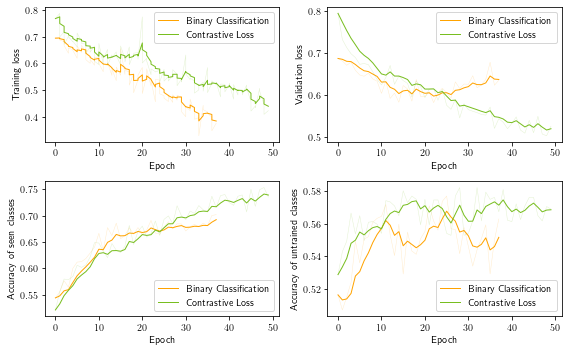

In [16]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8,5))
linewidth = 1.0
span = 5
alpha = 0.2

axs[0,0].set_xlabel('Epoch')
axs[0,0].set_ylabel('Training loss')
axs[0,0].plot(df1_train['epoch'], df1_train['value'].ewm(span=span, adjust=False).mean(), '#FFA300', label='Binary Classification', linewidth=linewidth)
axs[0,0].plot(df1_train['epoch'], df1_train['value'], '#FFA300', linewidth=linewidth/2, alpha=alpha)
axs[0,0].plot(df2_train['epoch'], df2_train['value'].ewm(span=span, adjust=False).mean(), '#78BE20', label='Contrastive Loss', linewidth=linewidth)
axs[0,0].plot(df2_train['epoch'], df2_train['value'], '#78BE20', linewidth=linewidth/2, alpha=alpha)
axs[0,0].legend(loc='upper right')

axs[0,1].set_xlabel('Epoch')
axs[0,1].set_ylabel('Validation loss')
axs[0,1].plot(df1_val['epoch'], df1_val['value'].ewm(span=span, adjust=False).mean(), '#FFA300', label='Binary Classification', linewidth=linewidth)
axs[0,1].plot(df1_val['epoch'], df1_val['value'], '#FFA300', linewidth=linewidth/2, alpha=alpha)
axs[0,1].plot(df2_val['epoch'], df2_val['value'].ewm(span=span, adjust=False).mean(), '#78BE20', label='Contrastive Loss', linewidth=linewidth)
axs[0,1].plot(df2_val['epoch'], df2_val['value'], '#78BE20', linewidth=linewidth/2, alpha=alpha)
axs[0,1].legend(loc='upper right')

axs[1,0].set_xlabel('Epoch')
axs[1,0].set_ylabel('Accuracy of seen classes')
axs[1,0].plot(df1_seen['epoch'], df1_seen['value'].ewm(span=span, adjust=False).mean(), '#FFA300', label='Binary Classification', linewidth=linewidth)
axs[1,0].plot(df1_seen['epoch'], df1_seen['value'], '#FFA300', linewidth=linewidth/2, alpha=alpha)
axs[1,0].plot(df2_seen['epoch'], df2_seen['value'].ewm(span=span, adjust=False).mean(), '#78BE20', label='Contrastive Loss', linewidth=linewidth)
axs[1,0].plot(df2_seen['epoch'], df2_seen['value'], '#78BE20', linewidth=linewidth/2, alpha=alpha)
axs[1,0].legend(loc='lower right')

axs[1,1].set_xlabel('Epoch')
axs[1,1].set_ylabel('Accuracy of untrained classes')
axs[1,1].plot(df1_unseen['epoch'], df1_unseen['value'].ewm(span=span, adjust=False).mean(), '#FFA300', label='Binary Classification', linewidth=linewidth)
axs[1,1].plot(df1_unseen['epoch'], df1_unseen['value'], '#FFA300', linewidth=linewidth/2, alpha=alpha)
axs[1,1].plot(df2_unseen['epoch'], df2_unseen['value'].ewm(span=span, adjust=False).mean(), '#78BE20', label='Contrastive Loss', linewidth=linewidth)
axs[1,1].plot(df2_unseen['epoch'], df2_unseen['value'], '#78BE20', linewidth=linewidth/2, alpha=alpha)
axs[1,1].legend(loc='lower right')
fig.tight_layout()
plt.gcf().savefig('images/4.pdf', format='pdf', dpi=1000, bbox_inches='tight')

### Get best results

In [17]:
idx_df1_val_min = df1_val['value'].idxmin()
epoch_df1_val_min = df1_val.loc[idx_df1_val_min]['epoch']
print(df1_train[df1_train['epoch']==epoch_df1_val_min])
print(df1_val[df1_val['epoch']==epoch_df1_val_min])
print(df1_seen[df1_seen['epoch']==epoch_df1_val_min])
print(df1_unseen[df1_unseen['epoch']==epoch_df1_val_min])


                                                    run         tag  step  \
4263  Sigmoid-50-batchsize-256-no-pretrain-lr-1e-04/...  train_loss  2199   
4264  Sigmoid-50-batchsize-256-no-pretrain-lr-1e-04/...  train_loss  2249   

         value  epoch  
4263  0.515244   22.0  
4264  0.537343   22.0  
                                                    run       tag  step  \
4316  Sigmoid-50-batchsize-256-no-pretrain-lr-1e-04/...  val_loss  2253   

         value  epoch  
4316  0.581164   22.0  
                                                    run            tag  step  \
4054  Sigmoid-50-batchsize-256-no-pretrain-lr-1e-04/...  accuracy_seen  2253   

       value  epoch  
4054  0.6908   22.0  
                                                    run              tag  \
4092  Sigmoid-50-batchsize-256-no-pretrain-lr-1e-04/...  accuracy_unseen   

      step   value  epoch  
4092  2253  0.5616   22.0  


In [18]:
idx_df2_val_min = df2_val['value'].idxmin()
epoch_df2_val_min = df2_val.loc[idx_df2_val_min]['epoch']
print(df2_train[df2_train['epoch']==epoch_df2_val_min])
print(df2_val[df2_val['epoch']==epoch_df2_val_min])
print(df2_seen[df2_seen['epoch']==epoch_df2_val_min])
print(df2_unseen[df2_unseen['epoch']==epoch_df2_val_min])


                                                    run         tag  step  \
2156  Cosine-50-batchsize-256-no-pretrain-lr-5e-04/v...  train_loss  4799   
2157  Cosine-50-batchsize-256-no-pretrain-lr-5e-04/v...  train_loss  4849   

         value  epoch  
2156  0.445902   48.0  
2157  0.408981   48.0  
                                                    run       tag  step  \
2207  Cosine-50-batchsize-256-no-pretrain-lr-5e-04/v...  val_loss  4801   

         value  epoch  
2207  0.502347   48.0  
                                                    run            tag  step  \
1862  Cosine-50-batchsize-256-no-pretrain-lr-5e-04/v...  accuracy_seen  4801   

       value  epoch  
1862  0.7528   48.0  
                                                    run              tag  \
1912  Cosine-50-batchsize-256-no-pretrain-lr-5e-04/v...  accuracy_unseen   

      step   value  epoch  
1912  4801  0.5704   48.0  


## Plots for trained models

In [19]:
df1_train = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-lr-1e-04/version_2') & (df_metrics['tag']=='train_loss')]
df2_train = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-lr-5e-04/version_0') & (df_metrics['tag']=='train_loss')]
df1_val = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-lr-1e-04/version_2') & (df_metrics['tag']=='val_loss')]
df2_val = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-lr-5e-04/version_0') & (df_metrics['tag']=='val_loss')]
df1_seen = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-lr-1e-04/version_2') & (df_metrics['tag']=='accuracy_seen')]
df2_seen = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-lr-5e-04/version_0') & (df_metrics['tag']=='accuracy_seen')]
df1_unseen = df_metrics[(df_metrics['run']=='Sigmoid-50-batchsize-256-lr-1e-04/version_2') & (df_metrics['tag']=='accuracy_unseen')]
df2_unseen = df_metrics[(df_metrics['run']=='Cosine-50-batchsize-256-lr-5e-04/version_0') & (df_metrics['tag']=='accuracy_unseen')]

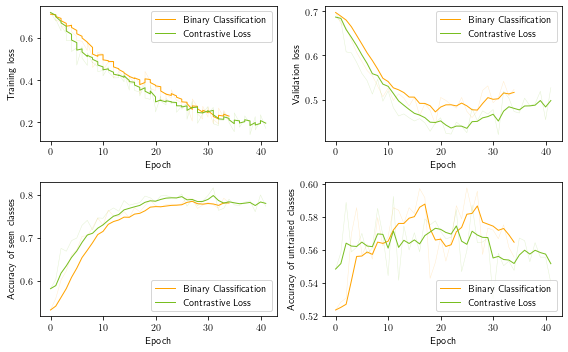

In [20]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8,5))
linewidth = 1.0
span = 5
alpha = 0.2

axs[0,0].set_xlabel('Epoch')
axs[0,0].set_ylabel('Training loss')
axs[0,0].plot(df1_train['epoch'], df1_train['value'].ewm(span=span, adjust=False).mean(), '#FFA300', label='Binary Classification', linewidth=linewidth)
axs[0,0].plot(df1_train['epoch'], df1_train['value'], '#FFA300', linewidth=linewidth/2, alpha=alpha)
axs[0,0].plot(df2_train['epoch'], df2_train['value'].ewm(span=span, adjust=False).mean(), '#78BE20', label='Contrastive Loss', linewidth=linewidth)
axs[0,0].plot(df2_train['epoch'], df2_train['value'], '#78BE20', linewidth=linewidth/2, alpha=alpha)
axs[0,0].legend(loc='upper right')

axs[0,1].set_xlabel('Epoch')
axs[0,1].set_ylabel('Validation loss')
axs[0,1].plot(df1_val['epoch'], df1_val['value'].ewm(span=span, adjust=False).mean(), '#FFA300', label='Binary Classification', linewidth=linewidth)
axs[0,1].plot(df1_val['epoch'], df1_val['value'], '#FFA300', linewidth=linewidth/2, alpha=alpha)
axs[0,1].plot(df2_val['epoch'], df2_val['value'].ewm(span=span, adjust=False).mean(), '#78BE20', label='Contrastive Loss', linewidth=linewidth)
axs[0,1].plot(df2_val['epoch'], df2_val['value'], '#78BE20', linewidth=linewidth/2, alpha=alpha)
axs[0,1].legend(loc='upper right')

axs[1,0].set_xlabel('Epoch')
axs[1,0].set_ylabel('Accuracy of seen classes')
axs[1,0].plot(df1_seen['epoch'], df1_seen['value'].ewm(span=span, adjust=False).mean(), '#FFA300', label='Binary Classification', linewidth=linewidth)
axs[1,0].plot(df1_seen['epoch'], df1_seen['value'], '#FFA300', linewidth=linewidth/2, alpha=alpha)
axs[1,0].plot(df2_seen['epoch'], df2_seen['value'].ewm(span=span, adjust=False).mean(), '#78BE20', label='Contrastive Loss', linewidth=linewidth)
axs[1,0].plot(df2_seen['epoch'], df2_seen['value'], '#78BE20', linewidth=linewidth/2, alpha=alpha)
axs[1,0].legend(loc='lower right')

axs[1,1].set_xlabel('Epoch')
axs[1,1].set_ylabel('Accuracy of untrained classes')
axs[1,1].plot(df1_unseen['epoch'], df1_unseen['value'].ewm(span=span, adjust=False).mean(), '#FFA300', label='Binary Classification', linewidth=linewidth)
axs[1,1].plot(df1_unseen['epoch'], df1_unseen['value'], '#FFA300', linewidth=linewidth/2, alpha=alpha)
axs[1,1].plot(df2_unseen['epoch'], df2_unseen['value'].ewm(span=span, adjust=False).mean(), '#78BE20', label='Contrastive Loss', linewidth=linewidth)
axs[1,1].plot(df2_unseen['epoch'], df2_unseen['value'], '#78BE20', linewidth=linewidth/2, alpha=alpha)
axs[1,1].legend(loc='lower right')
plt.tight_layout()
plt.gcf().savefig('images/5.pdf', format='pdf', dpi=1000, bbox_inches='tight')

### Get best results

In [21]:
idx_df1_val_min = df1_val['value'].idxmin()
epoch_df1_val_min = df1_val.loc[idx_df1_val_min]['epoch']
print(df1_train[df1_train['epoch']==epoch_df1_val_min])
print(df1_val[df1_val['epoch']==epoch_df1_val_min])
print(df1_seen[df1_seen['epoch']==epoch_df1_val_min])
print(df1_unseen[df1_unseen['epoch']==epoch_df1_val_min])

                                              run         tag  step     value  \
3101  Sigmoid-50-batchsize-256-lr-1e-04/version_2  train_loss  1899  0.396791   
3102  Sigmoid-50-batchsize-256-lr-1e-04/version_2  train_loss  1949  0.361266   

      epoch  
3101   19.0  
3102   19.0  
                                              run       tag  step     value  \
3151  Sigmoid-50-batchsize-256-lr-1e-04/version_2  val_loss  1959  0.444171   

      epoch  
3151   19.0  
                                              run            tag  step  \
2910  Sigmoid-50-batchsize-256-lr-1e-04/version_2  accuracy_seen  1959   

       value  epoch  
2910  0.7888   19.0  
                                              run              tag  step  \
2945  Sigmoid-50-batchsize-256-lr-1e-04/version_2  accuracy_unseen  1959   

       value  epoch  
2945  0.5524   19.0  


In [22]:
idx_df2_val_min = df2_val['value'].idxmin()
epoch_df2_val_min = df2_val.loc[idx_df2_val_min]['epoch']
print(df2_train[df2_train['epoch']==epoch_df2_val_min])
print(df2_val[df2_val['epoch']==epoch_df2_val_min])
print(df2_seen[df2_seen['epoch']==epoch_df2_val_min])
print(df2_unseen[df2_unseen['epoch']==epoch_df2_val_min])


                                             run         tag  step     value  \
1263  Cosine-50-batchsize-256-lr-5e-04/version_0  train_loss  3099  0.270967   
1264  Cosine-50-batchsize-256-lr-5e-04/version_0  train_loss  3149  0.193707   

      epoch  
1263   31.0  
1264   31.0  
                                             run       tag  step     value  \
1315  Cosine-50-batchsize-256-lr-5e-04/version_0  val_loss  3135  0.420385   

      epoch  
1315   31.0  
                                             run            tag  step   value  \
1025  Cosine-50-batchsize-256-lr-5e-04/version_0  accuracy_seen  3135  0.8168   

      epoch  
1025   31.0  
                                             run              tag  step  \
1067  Cosine-50-batchsize-256-lr-5e-04/version_0  accuracy_unseen  3135   

      value  epoch  
1067  0.558   31.0  


## Analyse CL model

In [23]:
modelCL = models.SiameseCosine.load_from_checkpoint('lightning_logs/Cosine-50-batchsize-256-lr-5e-04/version_0/checkpoints/epoch=31-step=3136.ckpt')
modelCL.eval()

SiameseCosine(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      

In [24]:
DATA_DIR = 'data/tiny-imagenet-200'
TRAIN_DIR = os.path.join(DATA_DIR, 'train') 
VALID_DIR = os.path.join(DATA_DIR, 'val')
VALID_IMG_DIR = os.path.join(VALID_DIR, 'images')
categories = 50

In [25]:
preprocess_transform_pretrain = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                            std=[0.229, 0.224, 0.225])
])

In [26]:
train_loader = utils.generate_dataloader(TRAIN_DIR, "train", categories=categories, 
                                  transform=preprocess_transform_pretrain, batch_size=256, unseen=False)
val_seen_loader = utils.generate_dataloader(VALID_IMG_DIR, "val_seen", categories=categories, 
                                  transform=preprocess_transform_pretrain, batch_size=256, unseen=False)
val_unseen_loader = utils.generate_dataloader(VALID_IMG_DIR, "val_unseen", categories=categories, 
                                  transform=preprocess_transform_pretrain, batch_size=256, unseen=True)

### Compare similarity performance with dissimilarity performance

In [27]:
combined_loader_CL = modelCL.val_dataloader(val_seen_loader, val_unseen_loader)

CL_seen = torch.tensor([True])
CL_unseen = torch.tensor([True])
for idx_batch, val_batch in enumerate(iter(combined_loader_CL)):
    prediction_correctness = modelCL.get_prediction_correctness(val_batch,idx_batch)
    CL_seen = torch.cat((CL_seen,prediction_correctness[0]))
    CL_unseen = torch.cat((CL_unseen,prediction_correctness[1]))
    print(idx_batch, len(CL_seen))

/Users/theongu/Repos/MPhil Machine Learning and Machine Intelligence /MLMI12-miniproject/models.py:164: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


0 257
1 513
2 769
3 1025
4 1281
5 1537
6 1793
7 2049
8 2305
9 2501


In [28]:
CL_seen_similarity = CL_seen[1::2]
CL_seen_dissimilarity = CL_seen[2::2]
CL_unseen_similarity = CL_unseen[1::2]
CL_unseen_dissimilarity = CL_unseen[2::2]

In [29]:
CL_seen[1:].sum()/2500

tensor(0.8028)

In [30]:
CL_seen_similarity.sum()/1250

tensor(0.7192)

In [31]:
CL_seen_dissimilarity.sum()/1250

tensor(0.8864)

In [32]:
CL_unseen[1:].sum()/2500

tensor(0.5520)

In [33]:
CL_unseen_similarity.sum()/1250

tensor(0.4152)

In [34]:
CL_unseen_dissimilarity.sum()/1250

tensor(0.6888)

### Class 1: fish

In [35]:
dataset_fish = datasets.ImageFolder('data/tiny-imagenet-200/train/n01443537', transform=preprocess_transform_pretrain)

In [36]:
h1 = modelCL.forward_once(dataset_fish[0][0].reshape(1,3,64,64)).detach().numpy()

In [37]:
img_class_fish = h1
for image, _ in dataset_fish:
    CL_classification = modelCL.forward_once(image.reshape(1,3,64,64)).detach().numpy()
    img_class_fish = np.concatenate((img_class_fish,CL_classification))

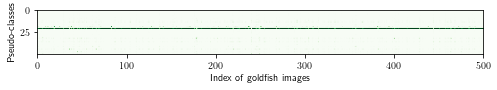

In [38]:
fig, axs = plt.subplots(1, figsize=(8,1))
im = axs.imshow(img_class_fish.T,vmin=0, vmax=0.7, cmap=cm.Greens)
axs.set_ylabel('Pseudo-classes')
axs.set_xlabel('Index of goldfish images')
plt.gcf().savefig('images/9.pdf', format='pdf', dpi=1000, bbox_inches='tight')

### Class 51: bison

In [39]:
dataset_bison = datasets.ImageFolder('data/tiny-imagenet-200/train/n02410509', transform=preprocess_transform_pretrain)

In [40]:
h1 = modelCL.forward_once(dataset_bison[0][0].reshape(1,3,64,64)).detach().numpy()

In [41]:
img_class_bison = h1
for image, _ in dataset_bison:
    CL_classification = modelCL.forward_once(image.reshape(1,3,64,64)).detach().numpy()
    img_class_bison = np.concatenate((img_class_bison,CL_classification))

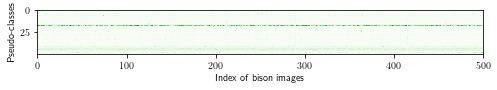

In [43]:
fig, axs = plt.subplots(1, figsize=(8,1))
im = axs.imshow(img_class_bison.T,vmin=0, vmax=0.7, cmap=cm.Greens)
axs.set_ylabel('Pseudo-classes')
axs.set_xlabel('Index of bison images')
plt.gcf().savefig('images/10.pdf', format='pdf', dpi=1000, bbox_inches='tight')

### Class3: bullfrog, class 4: tailed frog

In [44]:
dataset = datasets.ImageFolder('data/tiny-imagenet-200/train/n01641577', transform=preprocess_transform_pretrain)
h1 = modelCL.forward_once(dataset[0][0].reshape(1,3,64,64)).detach().numpy()

img_class_gr = h1
for image, _ in dataset:
    CL_classification = modelCL.forward_once(image.reshape(1,3,64,64)).detach().numpy()
    img_class_gr = np.concatenate((img_class_gr, CL_classification))

/Users/theongu/Repos/MPhil Machine Learning and Machine Intelligence /MLMI12-miniproject/models.py:164: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


In [45]:
dataset = datasets.ImageFolder('data/tiny-imagenet-200/train/n01644900', transform=preprocess_transform_pretrain)
h1 = modelCL.forward_once(dataset[0][0].reshape(1,3,64,64)).detach().numpy()

img_class_l = h1
for image, _ in dataset:
    CL_classification = modelCL.forward_once(image.reshape(1,3,64,64)).detach().numpy()
    img_class_l = np.concatenate((img_class_l, CL_classification))

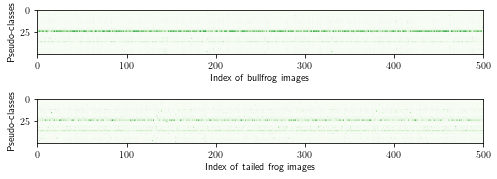

In [46]:
fig, axs = plt.subplots(nrows=2, figsize=(8,3))

axs[0].imshow(img_class_gr.T,vmin=0, vmax=0.7, cmap=cm.Greens)
axs[0].set_ylabel('Pseudo-classes')
axs[0].set_xlabel('Index of bullfrog images')

axs[1].imshow(img_class_l.T,vmin=0, vmax=0.7, cmap=cm.Greens)
axs[1].set_ylabel('Pseudo-classes')
axs[1].set_xlabel('Index of tailed frog images')

plt.gcf().savefig('images/11.pdf', format='pdf', dpi=1000, bbox_inches='tight')

### Classes

In [48]:
TIN = [name for name in os.listdir("data/tiny-imagenet-200/train")]
TIN.remove('.DS_Store')

with open('data/tiny-imagenet-200/words.txt') as f:
    lines = f.readlines()
    
classes = {line.split('\t')[0]: line.split('\t')[1] for line in lines}
classes_TIN = {tin: classes[tin].replace('\n','') for tin in TIN}
ordered_classes_TIN = collections.OrderedDict(sorted(classes_TIN.items()))

In [49]:
ordered_classes_TIN

OrderedDict([('n01443537', 'goldfish, Carassius auratus'),
             ('n01629819', 'European fire salamander, Salamandra salamandra'),
             ('n01641577', 'bullfrog, Rana catesbeiana'),
             ('n01644900',
              'tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui'),
             ('n01698640', 'American alligator, Alligator mississipiensis'),
             ('n01742172', 'boa constrictor, Constrictor constrictor'),
             ('n01768244', 'trilobite'),
             ('n01770393', 'scorpion'),
             ('n01774384', 'black widow, Latrodectus mactans'),
             ('n01774750', 'tarantula'),
             ('n01784675', 'centipede'),
             ('n01855672', 'goose'),
             ('n01882714',
              'koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus'),
             ('n01910747', 'jellyfish'),
             ('n01917289', 'brain coral'),
             ('n01944390', 'snail'),
             ('n01945685', 'slug'),
          